In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *
import json
from urllib.error import URLError,HTTPError
import time
from pathlib import Path
from fastdownload import download_url
from fastai.vision.all import *

In [2]:
def search_images_ddg(term, max_images=200):
    "Search for `term` with DuckDuckGo and return a unique urls of about `max_images` images"
    print(f'searching for {term}')
    assert max_images<1000
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    assert searchObj
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    headers = dict(referer='https://duckduckgo.com/')
    while len(urls)<max_images and 'next' in data:
        try:
            res = urlread(requestUrl, data=params, headers=headers)
            data = json.loads(res) if res else {}
            urls.update(L(data['results']).itemgot('image'))
            requestUrl = url + data['next']
        except (URLError,HTTPError): pass
        time.sleep(1)
    return L(urls)[:max_images]

In [3]:
# create DIR for notebook and set current DIR
NOTEBOOK_DIR = "Deployment"
Path(NOTEBOOK_DIR).mkdir(parents=True, exist_ok=True)

Search Image on Duck Duck Go for grizzly bear

In [11]:
path = Path(NOTEBOOK_DIR + '/images')

In [12]:
fns = get_image_files(path)
fns

(#79) [Path('Deployment/images/grizzly/1c196c0a-1cf6-4b9d-a774-00eaf8aff508.jpg'),Path('Deployment/images/grizzly/05b795d9-e5f7-454d-afc7-bf4123d3fc63.jpg'),Path('Deployment/images/grizzly/594bf216-42f9-4556-9c76-28f9dc2bf56a.jpg'),Path('Deployment/images/grizzly/4467716f-5416-4bd5-aca2-50efb5cf0fa2.jpg'),Path('Deployment/images/grizzly/6e329483-6be6-4295-9d71-427faebca705.jpg'),Path('Deployment/images/grizzly/39905c97-a367-4435-a2c9-8572839d86a3.jpg'),Path('Deployment/images/grizzly/6d03dcd9-110b-42ed-bad9-c22831aea28c.jpg'),Path('Deployment/images/grizzly/3ab1e0c4-7481-43dd-918d-3e718f09250c.jpg'),Path('Deployment/images/grizzly/bb979c40-ecd8-4250-9b41-26319e42012c.jpg'),Path('Deployment/images/grizzly/c8d19d2c-cb1d-4c95-b235-0398c1bcc7ac.jpg')...]

Check for broken image files

In [14]:
failed = verify_images(fns)
failed

(#2) [Path('Deployment/images/teddy/b60cd743-c986-4043-a9a0-49a97f7a397d.JPG'),Path('Deployment/images/teddy/af52f7a1-2f4e-422d-ab5b-2fd9f278e716.jpg')]

Delete broken image files

In [15]:
failed.map(Path.unlink);

In [48]:
get_image_files(path)

(#77) [Path('Deployment/images/grizzly/1c196c0a-1cf6-4b9d-a774-00eaf8aff508.jpg'),Path('Deployment/images/grizzly/05b795d9-e5f7-454d-afc7-bf4123d3fc63.jpg'),Path('Deployment/images/grizzly/594bf216-42f9-4556-9c76-28f9dc2bf56a.jpg'),Path('Deployment/images/grizzly/4467716f-5416-4bd5-aca2-50efb5cf0fa2.jpg'),Path('Deployment/images/grizzly/6e329483-6be6-4295-9d71-427faebca705.jpg'),Path('Deployment/images/grizzly/39905c97-a367-4435-a2c9-8572839d86a3.jpg'),Path('Deployment/images/grizzly/6d03dcd9-110b-42ed-bad9-c22831aea28c.jpg'),Path('Deployment/images/grizzly/3ab1e0c4-7481-43dd-918d-3e718f09250c.jpg'),Path('Deployment/images/grizzly/bb979c40-ecd8-4250-9b41-26319e42012c.jpg'),Path('Deployment/images/grizzly/c8d19d2c-cb1d-4c95-b235-0398c1bcc7ac.jpg')...]

In [23]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)
    

In [28]:
dls = bears.dataloaders(path)

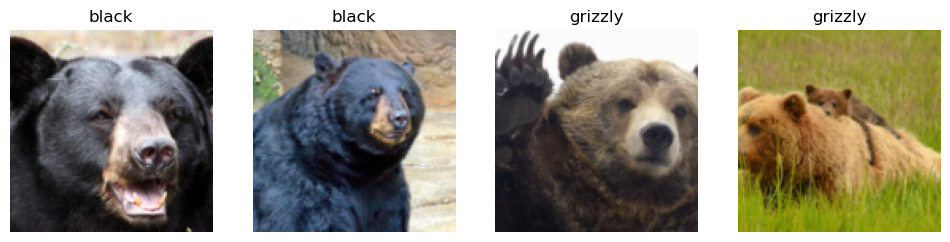

In [32]:
dls.valid.show_batch(max_n=4, nrows=1)

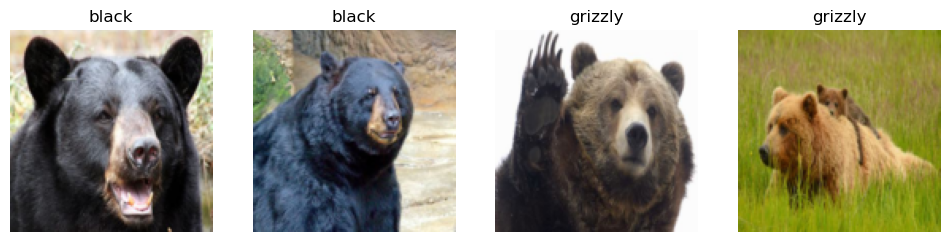

In [34]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

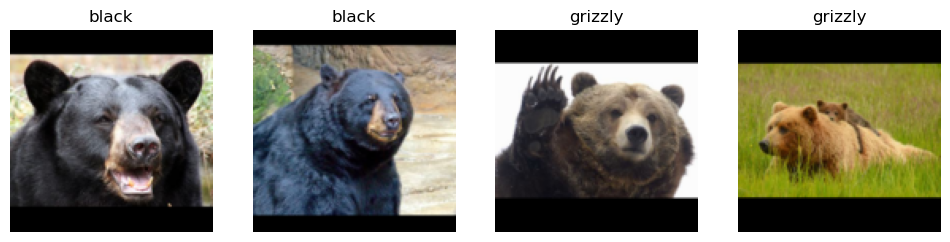

In [36]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

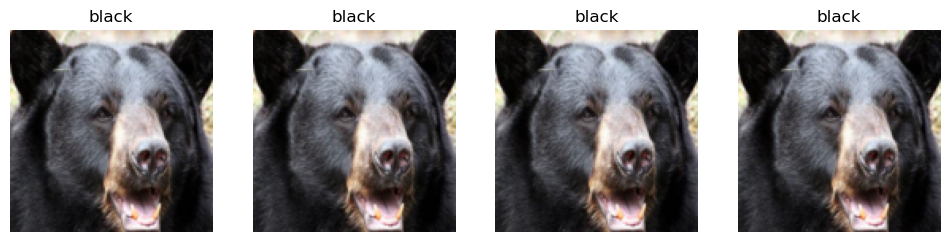

In [39]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1, unique=True)

In [44]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

ValueError: This DataLoader does not contain any batches

In [47]:
len(dls.train)

0